In [57]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [173]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [5]:
dados_treinamento = pd.read_table('D:/Dados/Desktop/R/Kaggle - Digit Recognizer/train.csv', sep=',')
dados_teste = pd.read_table('D:/Dados/Desktop/R/Kaggle - Digit Recognizer/test.csv', sep=',')

In [125]:
treinamento = dados_treinamento.drop(labels = ['label'], axis = 1)
treinamento = np.array(treinamento, dtype = np.float32)
teste = np.array(dados_teste, dtype = np.float32)
labels_treinamento = dados_treinamento['label']
labels_treinamento = np.array(labels_treinamento)

In [126]:
treinamento = treinamento.reshape(-1, 28, 28, 1)
labels_treinamento = labels_treinamento.reshape(-1, 1)
teste = teste.reshape(-1, 28, 28, 1)

In [227]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 6, kernel_size = (5,5))
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 12, kernel_size = (5,5))
        
        self.fc1 = nn.Linear(in_features = 192, out_features = 120)
        self.fc2 = nn.Linear(in_features = 120, out_features = 60)
        self.out = nn.Linear(in_features = 60, out_features = 10)
        
    def forward(self, t):
        
        t = F.relu(self.conv1(t))
        t = F.max_pool2d(t, kernel_size = (2,2), stride = 2)
        
        t = F.relu(self.conv2(t))
        t = F.max_pool2d(t, kernel_size = (2,2), stride = 2)
        
        t = t.reshape(-1, 192)
        
        t = F.relu(self.fc1(t))
        t = F.relu(self.fc2(t))
        t = self.out(t)
        
        return t

In [186]:
def numero_predicoes_corretas(preds, labels):
    return preds.argmax(dim = 1).eq(labels).sum().item()

In [228]:
model = Network()
model.to(device)

#train_loader = torch.utils.data.DataLoader(treinamento, batch_size = 50)


optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [229]:
torch.set_grad_enabled(True)
for epoch in range(10):
    
    total_loss = 0
    total_correct = 0
    
    for i in range(2000):
        imagem = torch.cuda.FloatTensor(treinamento[i].reshape(1,1,28,28))
        label = torch.cuda.LongTensor(labels_treinamento[i])
        
        preds = model(imagem)
        loss = F.cross_entropy(preds, label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        total_correct += numero_predicoes_corretas(preds, label)
             
    print('Época: ', epoch, 'total correct: ', total_correct, 'loss: ', total_loss)     
        

Época:  0 total correct:  1577 loss:  1368.3014583783192
Época:  1 total correct:  1857 loss:  541.7550533440881
Época:  2 total correct:  1878 loss:  422.0764974505745
Época:  3 total correct:  1886 loss:  390.1978168694206
Época:  4 total correct:  1902 loss:  370.34403493398815
Época:  5 total correct:  1933 loss:  240.87346579988935
Época:  6 total correct:  1951 loss:  266.04135010797415
Época:  7 total correct:  1943 loss:  288.5881355122856
Época:  8 total correct:  1948 loss:  192.81522416223902
Época:  9 total correct:  1942 loss:  279.84547516794146


In [230]:
total_correct / 2000

0.971

tensor([3], device='cuda:0') 3


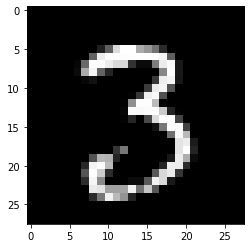

In [231]:
a = 3050
print(model(torch.cuda.FloatTensor(treinamento[a].reshape(1,1,28,28))).argmax(dim=1),
labels_treinamento[a][0])
plt.imshow(treinamento[a], cmap = 'gray')
plt.show()

tensor([8], device='cuda:0')


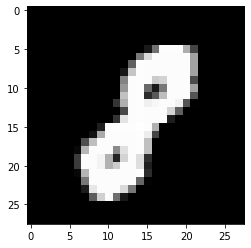

In [235]:
a = 3050
print(model(torch.cuda.FloatTensor(teste[a].reshape(1,1,28,28))).argmax(dim=1))
plt.imshow(teste[a], cmap = 'gray')
plt.show()